In [227]:
import pandas as pd
import numpy as np

# Load Dataset

In [228]:
#dataset_url = "https://raw.githubusercontent.com/Agnes4Him/project-datasets/refs/heads/main/smart_home_energy_consumption_large.csv"
dataset_url = "../data/capstone/smart_home_energy_consumption_large.csv"

In [229]:
df = pd.read_csv(dataset_url)

df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


# Exploratory Data Analysis

In [230]:
df.shape

(100000, 8)

In [231]:
df.columns

Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date',
       'Outdoor Temperature (°C)', 'Season', 'Household Size'],
      dtype='object')

In [232]:
df.dtypes

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

In [233]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[()]", "", regex=True)
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"_°c$", "", regex=True)
)

df.columns

Index(['home_id', 'appliance_type', 'energy_consumption_kwh', 'time', 'date',
       'outdoor_temperature', 'season', 'household_size'],
      dtype='object')

In [234]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,time,date,outdoor_temperature,season,household_size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [235]:
df.isnull().sum()

home_id                   0
appliance_type            0
energy_consumption_kwh    0
time                      0
date                      0
outdoor_temperature       0
season                    0
household_size            0
dtype: int64

In [236]:
df.describe().round()

,home_id,energy_consumption_kwh,outdoor_temperature,household_size
count,100000.0,100000.0,100000.0,100000.0
mean,250.0,1.0,15.0,3.0
std,144.0,1.0,14.0,1.0
min,1.0,0.0,-10.0,1.0
25%,125.0,1.0,2.0,2.0
50%,250.0,1.0,15.0,3.0
75%,375.0,2.0,27.0,4.0
max,500.0,5.0,40.0,5.0


In [237]:
df.appliance_type.value_counts()

appliance_type
Lights              10201
Dishwasher          10095
Air Conditioning    10067
Heater              10018
Washing Machine      9953
Microwave            9947
Computer             9944
Oven                 9939
Fridge               9931
TV                   9905
Name: count, dtype: int64

In [238]:
df.season.value_counts()

season
Spring    25112
Fall      25026
Summer    24966
Winter    24896
Name: count, dtype: int64

In [239]:
df.appliance_type.unique()

array(['Fridge', 'Oven', 'Dishwasher', 'Heater', 'Microwave',
       'Air Conditioning', 'Computer', 'TV', 'Washing Machine', 'Lights'],
      dtype=object)

In [240]:
df.duplicated().any()

np.False_

In [241]:
df[df.duplicated()]

,home_id,appliance_type,energy_consumption_kwh,time,date,outdoor_temperature,season,household_size


In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='energy_consumption_kwh', ylabel='Count'>

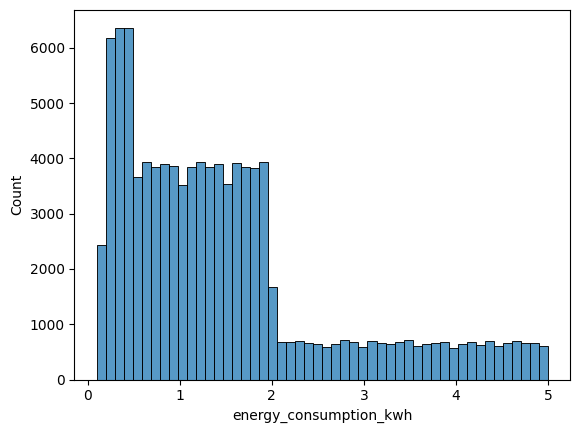

In [243]:
sns.histplot(df.energy_consumption_kwh, bins=50)

In [244]:
df["energy_consumption_kwh"].skew()

np.float64(1.2397544707469879)

In [245]:
# Due to skewness, consider these models for training - RandomForest, Decision Trees, XGBoost

# Feature Engineering

In [246]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["time"] = pd.to_datetime(df["time"], format="%H:%M")

In [247]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,time,date,outdoor_temperature,season,household_size
0,94,Fridge,0.20,1900-01-01 21:12:00,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,1900-01-01 20:11:00,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,1900-01-01 06:39:00,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,1900-01-01 21:56:00,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,1900-01-01 04:31:00,2023-08-26,34.5,Summer,5


In [248]:
df.dtypes

home_id                            int64
appliance_type                    object
energy_consumption_kwh           float64
time                      datetime64[ns]
date                      datetime64[ns]
outdoor_temperature              float64
season                            object
household_size                     int64
dtype: object

In [249]:
df["timestamp"] = pd.to_datetime(
    df["date"].dt.strftime("%Y-%m-%d") + " " + df["time"].dt.strftime("%H:%M")
)

In [250]:
df.drop(columns=["date", "time"], inplace=True)

In [251]:
df.dtypes

home_id                            int64
appliance_type                    object
energy_consumption_kwh           float64
outdoor_temperature              float64
season                            object
household_size                     int64
timestamp                 datetime64[ns]
dtype: object

In [252]:
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

In [253]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature,season,household_size,timestamp,hour,minute,day_of_week,day,month,is_weekend
0,94,Fridge,0.20,-1.0,Fall,2,2023-12-02 21:12:00,21,12,5,2,12,1
1,435,Oven,0.23,31.1,Summer,5,2023-08-06 20:11:00,20,11,6,6,8,1
2,466,Dishwasher,0.32,21.3,Fall,3,2023-11-21 06:39:00,6,39,1,21,11,0
3,496,Heater,3.92,-4.2,Winter,1,2023-01-21 21:56:00,21,56,5,21,1,1
4,137,Microwave,0.44,34.5,Summer,5,2023-08-26 04:31:00,4,31,5,26,8,1


In [254]:
df.drop(columns=["timestamp"], inplace=True)

In [255]:
df.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature,season,household_size,hour,minute,day_of_week,day,month,is_weekend
0,94,Fridge,0.20,-1.0,Fall,2,21,12,5,2,12,1
1,435,Oven,0.23,31.1,Summer,5,20,11,6,6,8,1
2,466,Dishwasher,0.32,21.3,Fall,3,6,39,1,21,11,0
3,496,Heater,3.92,-4.2,Winter,1,21,56,5,21,1,1
4,137,Microwave,0.44,34.5,Summer,5,4,31,5,26,8,1


In [256]:
df.dtypes

home_id                     int64
appliance_type             object
energy_consumption_kwh    float64
outdoor_temperature       float64
season                     object
household_size              int64
hour                        int32
minute                      int32
day_of_week                 int32
day                         int32
month                       int32
is_weekend                  int64
dtype: object

In [257]:
df.describe()

,home_id,energy_consumption_kwh,outdoor_temperature,household_size,hour,minute,day_of_week,day,month,is_weekend
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770,11.486460,29.484360,3.009970,15.674070,6.494090,0.289050
std,144.435367,1.181176,14.438755,1.417077,6.925759,17.301538,2.007837,8.791428,3.449386,0.453323
min,1.000000,0.100000,-10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,125.000000,0.590000,2.400000,2.000000,5.000000,15.000000,1.000000,8.000000,4.000000,0.000000
50%,250.000000,1.230000,14.900000,3.000000,11.000000,29.000000,3.000000,16.000000,6.000000,0.000000
75%,375.000000,1.870000,27.400000,4.000000,18.000000,44.000000,5.000000,23.000000,10.000000,1.000000
max,500.000000,5.000000,40.000000,5.000000,23.000000,59.000000,6.000000,31.000000,12.000000,1.000000


# Feature Importance

In [258]:
df.columns

Index(['home_id', 'appliance_type', 'energy_consumption_kwh',
       'outdoor_temperature', 'season', 'household_size', 'hour', 'minute',
       'day_of_week', 'day', 'month', 'is_weekend'],
      dtype='object')

In [261]:
numerical = [
    "outdoor_temperature", 
    "household_size", 
    "hour", 
    #"minute", 
    "day_of_week", 
    "day", "month", 
    "is_weekend"]

categorical = ["appliance_type", "season"]

In [262]:
df[numerical].corrwith(df["energy_consumption_kwh"]).abs().sort_values(ascending=False)

household_size         0.006501
day                    0.004980
hour                   0.003861
day_of_week            0.003564
outdoor_temperature    0.001995
month                  0.001908
is_weekend             0.000807
dtype: float64

# Split Data

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(60000, 20000, 20000)

In [265]:
df_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature,season,household_size,hour,minute,day_of_week,day,month,is_weekend
42684,169,Heater,2.42,27.1,Fall,4,18,23,3,14,12,0
42131,311,Fridge,0.48,33.4,Spring,3,21,5,5,27,5,1
84494,330,Computer,0.64,-0.5,Fall,2,6,26,5,4,11,1
43194,182,Air Conditioning,2.01,18.4,Fall,5,10,53,4,27,10,0
10394,432,Fridge,0.22,-2.4,Fall,1,0,47,1,10,10,0


In [266]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature,season,household_size,hour,minute,day_of_week,day,month,is_weekend
0,169,Heater,2.42,27.1,Fall,4,18,23,3,14,12,0
1,311,Fridge,0.48,33.4,Spring,3,21,5,5,27,5,1
2,330,Computer,0.64,-0.5,Fall,2,6,26,5,4,11,1
3,182,Air Conditioning,2.01,18.4,Fall,5,10,53,4,27,10,0
4,432,Fridge,0.22,-2.4,Fall,1,0,47,1,10,10,0


In [267]:
df_full_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature,season,household_size,hour,minute,day_of_week,day,month,is_weekend
78689,91,Heater,2.46,34.5,Summer,4,2,26,6,23,7,1
76423,24,Air Conditioning,4.72,21.5,Fall,4,9,41,0,20,11,0
86945,495,Lights,0.64,-9.2,Spring,2,12,14,1,4,4,0
57427,484,Dishwasher,0.22,34.4,Fall,5,9,47,3,30,11,0
34616,200,Dishwasher,1.80,-5.4,Spring,3,1,2,0,1,5,0


In [268]:
y_train = df_train["energy_consumption_kwh"].values
y_val = df_val["energy_consumption_kwh"].values
y_test = df_test["energy_consumption_kwh"].values

del df_train["energy_consumption_kwh"]
del df_val["energy_consumption_kwh"]
del df_test["energy_consumption_kwh"]

# One Hot Encoding

In [269]:
from sklearn.feature_extraction import DictVectorizer

In [270]:
dv = DictVectorizer()

In [271]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
val_dict = df_val[categorical + numerical].to_dict(orient="records")
test_dict = df_test[categorical + numerical].to_dict(orient="records")

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

# Train multiple models

In [272]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [273]:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://127.0.0.1:5000'


In [274]:
mlflow.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/2', creation_time=1767442712388, experiment_id='2', last_update_time=1767442712388, lifecycle_stage='active', name='RandomForest Full Train Experiment', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1767442708693, experiment_id='1', last_update_time=1767442708693, lifecycle_stage='active', name='RandomForest Experiment', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1767442650697, experiment_id='0', last_update_time=1767442650697, lifecycle_stage='active', name='Default', tags={}>]

# Train a Decison Tree Model

In [275]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline

In [47]:
dt = DecisionTreeRegressor()

In [48]:
dt.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [49]:
y_pred = dt.predict(X_val)

In [50]:
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.8345345776239592

In [51]:
'''def train_dt(max_depth, min_samples_leaf):
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    return rmse'''

def train_dt(params_dict):
    dt = DecisionTreeRegressor(max_depth=params_dict["max_depth"], min_samples_leaf=params_dict["min_samples_leaf"])
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    return rmse

In [52]:
scores = []
depths = [3, 5, 7, 10]
samples_leaf = [1, 5, 10, 15, 20, 500, 100, 200]

for depth in depths:
    for s in samples_leaf:
        params = {"max_depth": depth, "min_samples_leaf": s}
        #rmse = train_dt(depth, s)
        rmse = train_dt(params)
    
        scores.append((depth, s, rmse))

scores

[(3, 1, 0.5815804631107598),
 (3, 5, 0.5815804631107598),
 (3, 10, 0.5815804631107598),
 (3, 15, 0.5815804631107597),
 (3, 20, 0.5815804631107597),
 (3, 500, 0.5815462150670965),
 (3, 100, 0.5815804631107598),
 (3, 200, 0.581616209358165),
 (5, 1, 0.5828805326757547),
 (5, 5, 0.5828805326757547),
 (5, 10, 0.5828734690406184),
 (5, 15, 0.5830591665821778),
 (5, 20, 0.582858348491816),
 (5, 500, 0.5822211455951671),
 (5, 100, 0.5825507526355822),
 (5, 200, 0.5826256604792193),
 (7, 1, 0.5878425314197491),
 (7, 5, 0.5869280776302938),
 (7, 10, 0.5870012325839629),
 (7, 15, 0.5865470994008577),
 (7, 20, 0.5859857281663882),
 (7, 500, 0.5828635120567728),
 (7, 100, 0.5837080839346551),
 (7, 200, 0.5838567028717196),
 (10, 1, 0.5995268754611864),
 (10, 5, 0.5948799072778143),
 (10, 10, 0.5930802623405493),
 (10, 15, 0.5920505916010487),
 (10, 20, 0.5909964262474058),
 (10, 500, 0.5834988705050544),
 (10, 100, 0.5862714937208009),
 (10, 200, 0.5858009923122423)]

In [53]:
columns = ["max_depth", "min_samples_leaf", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

In [54]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth            3      5      7      10
min_samples_leaf                            
1                 0.582  0.583  0.588  0.600
5                 0.582  0.583  0.587  0.595
10                0.582  0.583  0.587  0.593
15                0.582  0.583  0.587  0.592
20                0.582  0.583  0.586  0.591
100               0.582  0.583  0.584  0.586
200               0.582  0.583  0.584  0.586
500               0.582  0.582  0.583  0.583

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

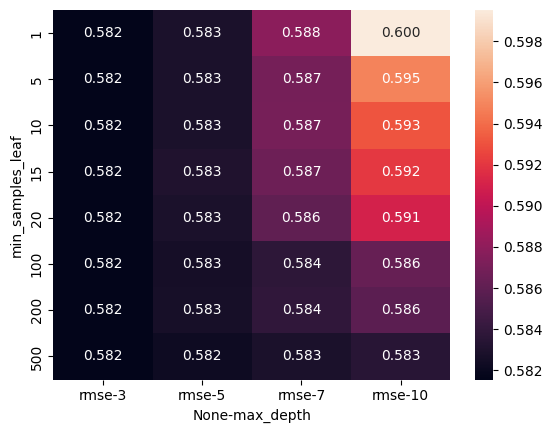

In [55]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [56]:
# Train Decision Tree with best parameters

In [57]:
mlflow.set_experiment("Decision Tree Experiment")

with mlflow.start_run():
    params = {"max_depth": 3, "min_samples_leaf": 10}
    mlflow.log_params(params)
    
    dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    mlflow.log_metric("root mean square error", rmse)

    pipeline = make_pipeline(dv, dt)
    mlflow.sklearn.log_model(pipeline, name="models")

2026/01/01 11:11:38 INFO mlflow.tracking.fluent: Experiment with name 'Decision Tree Experiment' does not exist. Creating a new experiment.
2026/01/01 11:11:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run wistful-jay-558 at: http://127.0.0.1:5000/#/experiments/1/runs/a65d3500d9774bb9bbc408f001bc5a3b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


# Train a RandomForestRegressor

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(n_jobs=-1)

In [49]:
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [50]:
y_pred = rf.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.5994330040063636

In [156]:
def train_rf(n_estimators, max_depth):
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=1, 
        n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    return rmse

In [157]:
scores = []
depths = [3, 5, 7, 10]
estimators = range(10, 201, 10)

for d in depths:
    for n in estimators:
        rmse = train_rf(n, d)

        scores.append((d, n, rmse))

In [158]:
columns = ['max_depth', 'estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [159]:
df_scores_pivot = df_scores.pivot(index='estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth      3      5      7      10
estimators                            
10          0.581  0.582  0.583  0.586
20          0.581  0.582  0.583  0.585
30          0.581  0.582  0.582  0.584
40          0.581  0.582  0.582  0.584
50          0.581  0.582  0.582  0.584
60          0.581  0.582  0.582  0.584
70          0.581  0.582  0.582  0.584
80          0.581  0.582  0.582  0.584
90          0.581  0.582  0.582  0.584
100         0.581  0.582  0.582  0.584
110         0.581  0.582  0.582  0.584
120         0.581  0.582  0.582  0.584
130         0.581  0.582  0.582  0.584
140         0.581  0.582  0.582  0.584
150         0.581  0.582  0.582  0.584
160         0.581  0.582  0.582  0.583
170         0.581  0.582  0.582  0.584
180         0.581  0.582  0.582  0.584
190         0.581  0.582  0.582  0.583
200         0.581  0.582  0.582  0.583

<Axes: xlabel='None-max_depth', ylabel='estimators'>

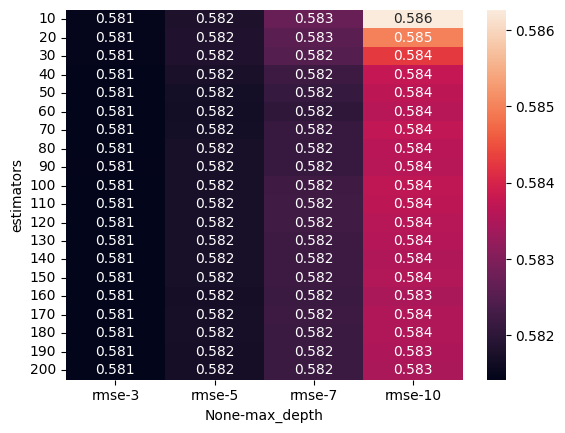

In [160]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [276]:
mlflow.set_experiment("RandomForest Experiment")

with mlflow.start_run():
    params = {"max_depth": 3, "n_estimators": 10}
    mlflow.log_params(params)
    
    rf = RandomForestRegressor(
            n_estimators=10,
            max_depth=3,
            random_state=1, 
            n_jobs=-1)
    
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    mlflow.log_metric("root mean square error", rmse)

    pipeline = make_pipeline(dv, rf)
    mlflow.sklearn.log_model(pipeline, name="models")

2026/01/03 12:29:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run resilient-hare-258 at: http://127.0.0.1:5000/#/experiments/1/runs/0d281808eb10465db13371aaa5e0ece6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


# Train XGBoost

In [60]:
!uv add xgboost

Resolved 168 packages in 1ms
Audited 162 packages in 1ms


In [61]:
import xgboost as xgb

In [62]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [164]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [165]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

0.5841078496819305

In [51]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [52]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [53]:
s = output.stdout

In [54]:
print(s[:200])

[0]	train-rmse:0.92848	val-rmse:0.92503
[5]	train-rmse:0.59232	val-rmse:0.59510
[9]	train-rmse:0.57728	val-rmse:0.58411



In [55]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [56]:
df_score = parse_xgb_output(output)

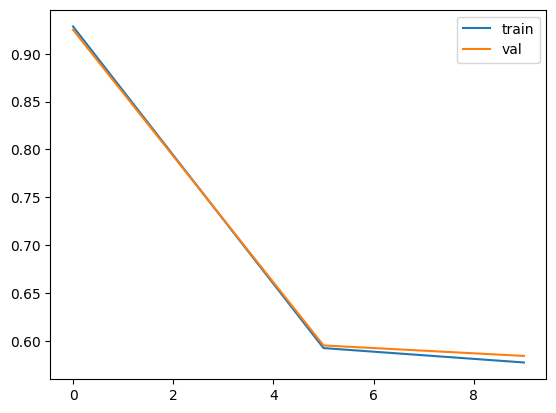

In [57]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

# XGBoost Parameter Tuning

In [ ]:
# eta, max_depth, min_child_weight

In [149]:
# ets
scores = {}

In [150]:
%%capture output
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [151]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

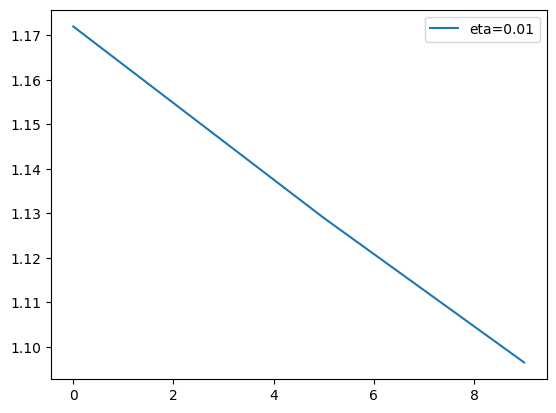

In [152]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
    
plt.legend()

In [96]:
# max_depth
scores = {}

In [97]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

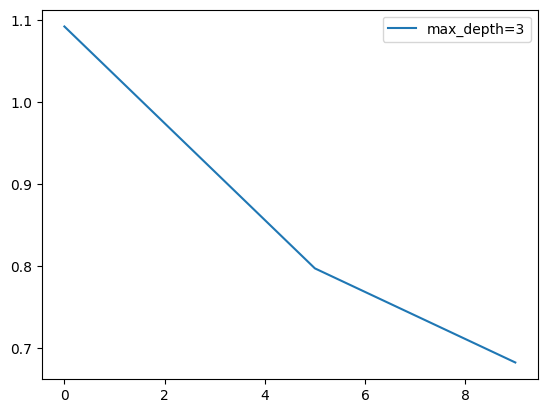

In [99]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

#plt.ylim(0.8, 0.84)
plt.legend()

In [124]:
# min_child_weight
scores = {}

In [125]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [126]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

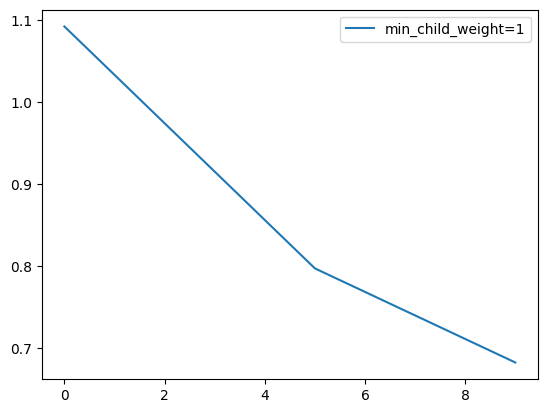

In [127]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

#plt.ylim(0.82, 0.84)
plt.legend()

In [63]:
mlflow.set_experiment("XGBoost Experiment")

with mlflow.start_run():
    params = {"eta": 0.1, "max_depth": 3, "min_child_weight": 1}
    mlflow.log_params(params)
    
    xgb_params = {
        'eta': 0.1, 
        'max_depth': 3,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    
    model = xgb.train(xgb_params, 
                      dtrain, 
                      num_boost_round=100
                     )
    
    y_pred = model.predict(dval)
    rmse = root_mean_squared_error(y_val, y_pred)

    mlflow.log_metric("root mean squared error", rmse)

    pipeline = make_pipeline(dv, model)
    mlflow.sklearn.log_model(pipeline, name="models")
    
    print(f"default artifacts URI: '{mlflow.get_artifact_uri()}'")

2026/01/01 11:14:26 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost Experiment' does not exist. Creating a new experiment.
2026/01/01 11:14:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


default artifacts URI: 'mlflow-artifacts:/3/7975d37f2063493caf176a705b4987fe/artifacts'
🏃 View run rumbling-crane-230 at: http://127.0.0.1:5000/#/experiments/3/runs/7975d37f2063493caf176a705b4987fe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3


# Training the final model - RandomForest

In [277]:
df_full_train.head()

,home_id,appliance_type,energy_consumption_kwh,outdoor_temperature,season,household_size,hour,minute,day_of_week,day,month,is_weekend
78689,91,Heater,2.46,34.5,Summer,4,2,26,6,23,7,1
76423,24,Air Conditioning,4.72,21.5,Fall,4,9,41,0,20,11,0
86945,495,Lights,0.64,-9.2,Spring,2,12,14,1,4,4,0
57427,484,Dishwasher,0.22,34.4,Fall,5,9,47,3,30,11,0
34616,200,Dishwasher,1.80,-5.4,Spring,3,1,2,0,1,5,0


In [278]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train["energy_consumption_kwh"].values

In [279]:
del df_full_train["energy_consumption_kwh"]

In [280]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [281]:
import pickle

In [282]:
mlflow.set_experiment("RandomForest Full Train Experiment")

with mlflow.start_run():
    params = {"max_depth": 3, "n_estimators": 10}
    mlflow.log_params(params)
    rf = RandomForestRegressor(
            n_estimators=10,
            max_depth=3,
            random_state=1, 
            n_jobs=-1)
    
    rf.fit(X_full_train, y_full_train)

    y_pred = rf.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)

    mlflow.log_metric("root mean square error", rmse)

    pipeline = make_pipeline(dv, rf)
    mlflow.sklearn.log_model(pipeline, name="models")

    # Save model locally
    model_path = "./models/model.bin"
    with open(model_path, "wb") as f_out:
        pickle.dump((pipeline), f_out)

    print(f"default artifacts URI: '{mlflow.get_artifact_uri()}'")

2026/01/03 12:30:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


default artifacts URI: 'mlflow-artifacts:/2/a7a7843df3ad44fb8cb930a386c10d38/artifacts'
🏃 View run upset-cat-860 at: http://127.0.0.1:5000/#/experiments/2/runs/a7a7843df3ad44fb8cb930a386c10d38
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2


# Test model using locally saved model

In [59]:
household = df.iloc[75][categorical + numerical]
household

appliance_type            Computer
season                        Fall
outdoor_temperature_°c        17.8
household_size                   5
hour                            20
day_of_week                      0
day                             13
month                           11
is_weekend                       0
Name: 75, dtype: object

In [60]:
y_household_actual = df.iloc[75].energy_consumption_kwh
y_household_actual

np.float64(0.83)

In [61]:
household_dict = household.to_dict()
household_dict

{'appliance_type': 'Computer',
 'season': 'Fall',
 'outdoor_temperature_°c': 17.8,
 'household_size': 5,
 'hour': 20,
 'day_of_week': 0,
 'day': 13,
 'month': 11,
 'is_weekend': 0}

In [62]:
with open("./models//model.bin", "rb") as f_in:
    dv, rf = pickle.load(f_in)

In [63]:
X_household = dv.transform(household_dict)

y_household_pred = rf.predict(X_household)
y_household_pred

array([1.09769957])

In [64]:
# Define a function to test model
def predict_consumption(index):
    household = df.iloc[index][categorical + numerical]
    household_dict = household.to_dict()
    y_household_actual = df.iloc[index].energy_consumption_kwh

    with open("./models//model.bin", "rb") as f_in:
        dv, rf = pickle.load(f_in)

    X_household = dv.transform(household_dict)

    y_household_pred = rf.predict(X_household)
    print(f"Actual energy consumption: {y_household_actual}")
    print(f"Predicted eneregy consumption: {y_household_pred[0].round()}")

In [65]:
predict_consumption(90)

Actual energy consumption: 1.68
Predicted eneregy consumption: 1.0


# Test model saved in MLFlow

In [283]:
from mlflow.tracking import MlflowClient

client = MlflowClient("http://127.0.0.1:5000")

In [284]:
client.search_registered_models()

[<RegisteredModel: aliases={}, creation_timestamp=1767442715536, deployment_job_id='', deployment_job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', description='', last_updated_timestamp=1767442715834, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1767442715834, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1767442715834, metrics=None, model_id=None, name='Energy Consumption RandomForestRegression - Full Train', params=None, run_id='5bd1b96864ae406c8f8077e5701d5264', run_link='', source='models:/m-f0d39e9f3add4500a34cfa4cb4ab289d', status='READY', status_message=None, tags={}, user_id='', version='1'>], name='Energy Consumption RandomForestRegression - Full Train', tags={}>]

In [285]:
# Fetch the id of the latest run of the RandomForest Full Train Experiment...

run_id = client.search_runs(experiment_ids='1')[0].info.run_id
run_id

'0d281808eb10465db13371aaa5e0ece6'

In [286]:
# Register the model

mlflow.register_model(
    model_uri=f"runs:/{run_id}/models",
    name="energy-consumption-rf-full-train"
)

Successfully registered model 'energy-consumption-rf-full-train'.
2026/01/03 12:30:34 WARNING mlflow.tracking._model_registry.fluent: Run with id 0d281808eb10465db13371aaa5e0ece6 has no artifacts at artifact path 'models', registering model based on models:/m-35ba5b5b99cc4f8da532ba22023f42d8 instead
2026/01/03 12:30:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: energy-consumption-rf-full-train, version 1
Created version '1' of model 'energy-consumption-rf-full-train'.


<ModelVersion: aliases=[], creation_timestamp=1767443434589, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1767443434589, metrics=None, model_id=None, name='energy-consumption-rf-full-train', params=None, run_id='0d281808eb10465db13371aaa5e0ece6', run_link='', source='models:/m-35ba5b5b99cc4f8da532ba22023f42d8', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [287]:
# model_name = "energy-consumption-rf-full-train@latest"
model_name = "Energy Consumption RandomForestRegression - Full Train@latest"

model_uri = f"models:/{model_name}"

In [288]:
import mlflow.sklearn

sklearn_pipeline = mlflow.sklearn.load_model(model_uri)

In [289]:
dv = sklearn_pipeline.named_steps["dictvectorizer"]
rf = sklearn_pipeline.named_steps["randomforestregressor"]

In [290]:
rf

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at

In [291]:
# Define a function to test model
def predict_consumption2(index):
    household = df.iloc[index][categorical + numerical]
    household_dict = household.to_dict()
    y_household_actual = df.iloc[index].energy_consumption_kwh

    X_household = dv.transform(household_dict)

    y_household_pred = rf.predict(X_household)
    
    print(f"Actual energy consumption: {y_household_actual}")
    print(f"Predicted eneregy consumption: {y_household_pred[0].round()}")

In [292]:
predict_consumption2(500)

Actual energy consumption: 1.49
Predicted eneregy consumption: 1.0


In [224]:
!uv run mlflow --version

mlflow, version 3.8.1
